In [1]:
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima



In [2]:
#importacion del dataframe 
df = pd.read_csv("bicis.csv")
df

,Unnamed: 0,Trip Duration,Start Station Name,End Station Name,hora,fecha,dia,mes,dia de semana
0,0,1315,Bay St / Albert St,Gould St / Yonge St (Ryerson University),0,2021-01-01,1,1,Friday
1,1,396,Walnut Ave / Queen St W,Lisgar Park,0,2021-01-01,1,1,Friday
2,2,86,Hayter St / Laplante Ave,Bay St / College St (East Side),0,2021-01-01,1,1,Friday
3,3,741,Madison Ave / Bloor St W,Yonge St / Dundonald St - SMART,0,2021-01-01,1,1,Friday
4,4,2073,Priscilla Ave / Dundas St W - SMART,Priscilla Ave / Dundas St W - SMART,0,2021-01-01,1,1,Friday
...,...,...,...,...,...,...,...,...,...
3575177,145844,372,Dundas St E / Parliament St,Dundas St E / Victoria St,23,2021-12-31,31,12,Friday
3575178,145845,762,King / Cowan Ave - SMART,Toronto Inukshuk Park,23,2021-12-31,31,12,Friday
3575179,145846,355,Dundas St E / Parliament St,Dundas St E / Victoria St,23,2021-12-31,31,12,Friday
3575180,145847,770,Granby St / Church St - SMART,York St / Queens Quay W,23,2021-12-31,31,12,Friday


# Analisis de los viajes

"Index(['Saturday'], dtype='object')"

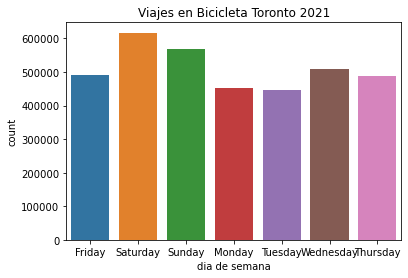

In [3]:
#Día de la semana con mayor numero de viajes
sns.countplot(x=df['dia de semana'], data=df)
plt.title('Viajes en Bicicleta Toronto 2021')
str(df['dia de semana'].value_counts().index[0:1])
   

"Int64Index([8], dtype='int64')"

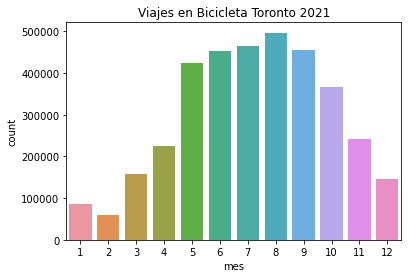

In [4]:
#Mes con mayor numero de viajes
sns.countplot(x=df['mes'], data=df)
plt.title('Viajes en Bicicleta Toronto 2021')
str(df['mes'].value_counts().index[0:1])

"Int64Index([17], dtype='int64')"

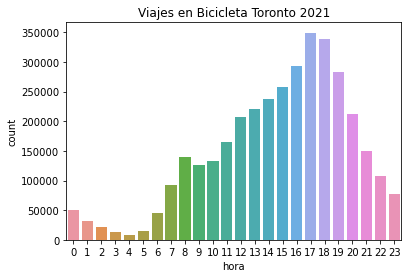

In [5]:
#Hora del día con mayor numero de viajes
sns.countplot(x=df['hora'], data=df)
plt.title('Viajes en Bicicleta Toronto 2021')
str(df['hora'].value_counts().index[0:1])

Text(0.5, 1.0, 'Viajes en Bicicleta Toronto 2021')

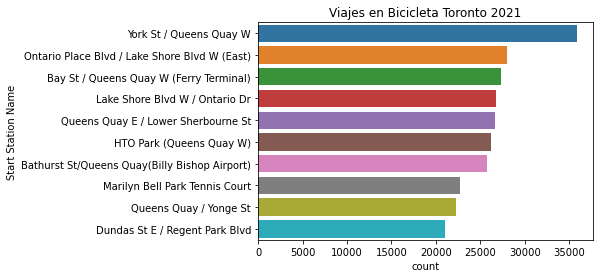

In [6]:
#Top 10 estaciones de salida con mayor numero de viajes
sns.countplot(y=df['Start Station Name'], order = df['Start Station Name'].value_counts().index[0:10],  data=df)
plt.title('Viajes en Bicicleta Toronto 2021')

Text(0.5, 1.0, 'Viajes en Bicicleta Toronto 2021')

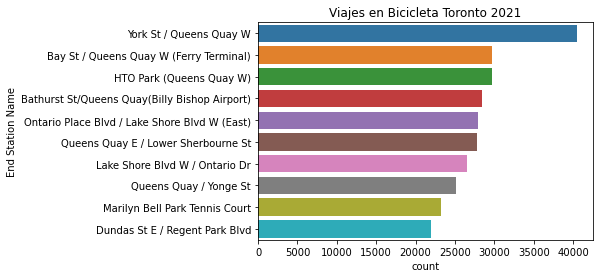

In [7]:
#Top 10 estaciones de llegada con mayor numero de viajes
sns.countplot(y=df['End Station Name'], order = df['End Station Name'].value_counts().index[0:10],  data=df)
plt.title('Viajes en Bicicleta Toronto 2021')


# Prediccion usando serie de tiempo

In [8]:
#Dataframe con la estacion de salida mas usada
df_station = df[df['Start Station Name']== 'York St / Queens Quay W']
df_station.pop('Unnamed: 0')
df_station

,Trip Duration,Start Station Name,End Station Name,hora,fecha,dia,mes,dia de semana
556,448,York St / Queens Quay W,Little Norway Park,12,2021-01-01,1,1,Friday
619,1159,York St / Queens Quay W,Madison Ave / Bloor St W,12,2021-01-01,1,1,Friday
700,651,York St / Queens Quay W,Wellington St W / Portland St,13,2021-01-01,1,1,Friday
1157,3176,York St / Queens Quay W,York St / Lake Shore Blvd W,15,2021-01-01,1,1,Friday
1238,996,York St / Queens Quay W,York St / Queens Quay W,15,2021-01-01,1,1,Friday
...,...,...,...,...,...,...,...,...
3574588,1417,York St / Queens Quay W,HTO Park (Queens Quay W),20,2021-12-31,31,12,Friday
3574589,1408,York St / Queens Quay W,HTO Park (Queens Quay W),20,2021-12-31,31,12,Friday
3574591,1399,York St / Queens Quay W,HTO Park (Queens Quay W),20,2021-12-31,31,12,Friday
3574594,1361,York St / Queens Quay W,HTO Park (Queens Quay W),20,2021-12-31,31,12,Friday


In [9]:
#Dataframe con valores promedio por dia 
means = df_station.groupby('fecha', as_index=False ).mean()
means

,fecha,Trip Duration,hora,dia,mes
0,2021-01-01,1350.500000,14.000000,1.0,1.0
1,2021-01-02,958.142857,16.285714,2.0,1.0
2,2021-01-03,883.750000,16.625000,3.0,1.0
3,2021-01-04,1072.857143,14.285714,4.0,1.0
4,2021-01-05,1252.333333,13.611111,5.0,1.0
...,...,...,...,...,...
360,2021-12-27,864.545455,13.090909,27.0,12.0
361,2021-12-28,786.550000,13.500000,28.0,12.0
362,2021-12-29,824.500000,13.583333,29.0,12.0
363,2021-12-30,615.300000,14.700000,30.0,12.0


In [10]:
#Juntamos frecuencias por día.
val = df_station['fecha'].value_counts().sort_index()
df2 = val.to_frame()
df2 = df2.rename(columns={'fecha':'count'})
df2

,count
2021-01-01,6
2021-01-02,7
2021-01-03,8
2021-01-04,14
2021-01-05,18
...,...
2021-12-27,11
2021-12-28,20
2021-12-29,12
2021-12-30,10


In [11]:
#Lista con fechas para predecir
prueba = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d")
fecha_predic = pd.date_range(prueba, periods=59)
fecha_predic = pd.DataFrame(fecha_predic, columns=['fecha'])
fecha_predic['fecha'] = fecha_predic['fecha'].dt.date

fecha_predic = fecha_predic['fecha'].value_counts().sort_index()
fecha_predic = fecha_predic.to_frame()
fecha_predic = fecha_predic.rename(columns={'fecha':'count'})
fecha_predic.index 

Index([2022-01-01, 2022-01-02, 2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06,
       2022-01-07, 2022-01-08, 2022-01-09, 2022-01-10, 2022-01-11, 2022-01-12,
       2022-01-13, 2022-01-14, 2022-01-15, 2022-01-16, 2022-01-17, 2022-01-18,
       2022-01-19, 2022-01-20, 2022-01-21, 2022-01-22, 2022-01-23, 2022-01-24,
       2022-01-25, 2022-01-26, 2022-01-27, 2022-01-28, 2022-01-29, 2022-01-30,
       2022-01-31, 2022-02-01, 2022-02-02, 2022-02-03, 2022-02-04, 2022-02-05,
       2022-02-06, 2022-02-07, 2022-02-08, 2022-02-09, 2022-02-10, 2022-02-11,
       2022-02-12, 2022-02-13, 2022-02-14, 2022-02-15, 2022-02-16, 2022-02-17,
       2022-02-18, 2022-02-19, 2022-02-20, 2022-02-21, 2022-02-22, 2022-02-23,
       2022-02-24, 2022-02-25, 2022-02-26, 2022-02-27, 2022-02-28],
      dtype='object')

# Modelado viajes por dia

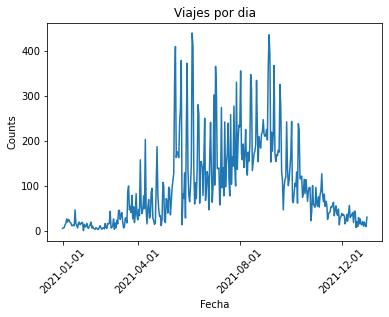

In [12]:
#Scatter plot 
plt.plot(df2.index, df2['count'])
plt.ylabel('Counts')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Viajes por dia")
plt.show()

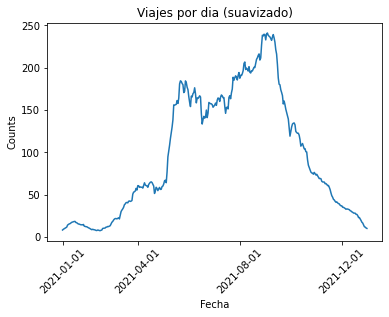

In [13]:
#Datos suavizados
def smooth(y, promedios):
    prom  = np.ones(promedios)/promedios
    y_smooth = np.convolve(y, prom, mode='same')
    return y_smooth

count_suav = smooth(df2['count'], 20)

#dataframe con datos suavizados
df_suave = pd.DataFrame(count_suav, columns=['count'])

#lineplot 
plt.plot(df2.index, count_suav)
plt.ylabel('Counts')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Viajes por dia (suavizado)")
plt.show()

C:\Users\mc_mo\AppData\Local\Temp\ipykernel_1176\1191074633.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['count'] = smooth(test['count'], 20)
C:\Users\mc_mo\AppData\Local\Temp\ipykernel_1176\1191074633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['count'] = smooth(train['count'], 20)


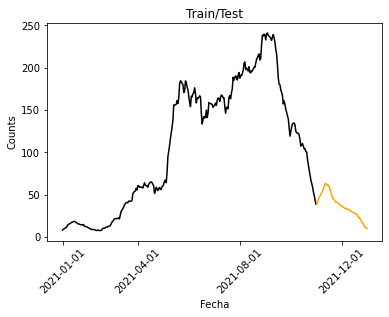

In [14]:
#Entrenamiento y testeo
train = df2[df2.index < "2021-11-01"]
test = df2[df2.index >= "2021-11-01"]

#Suavizado de testeo y entrenamiento
test['count'] = smooth(test['count'], 20)
train['count'] = smooth(train['count'], 20)

#Grafico de testeo y entrenamiento
plt.plot(train, color = "black")
plt.plot(test, color = "Orange")
plt.ylabel('Counts')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

## Modelo ARMA

C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


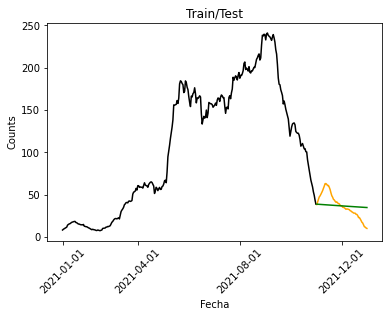

In [15]:
arma = SARIMAX(train)
arma = arma.fit()

arma_pred = arma.get_forecast(len(test.index))
#Un 95% de confianza
arma_pred_df = arma_pred.conf_int(alpha = 0.05) 
arma_pred_df["Prediccion"] = arma.predict(start = arma_pred_df.index[0], end = arma_pred_df.index[-1])
arma_pred_df.index = test.index
arma_pred_out = arma_pred_df["Prediccion"]

#Graficos sobrepuestos
plt.plot(train, color = "black")
plt.plot(test, color = "Orange")
plt.plot(arma_pred_out, color='green', label = 'Predictions')
plt.ylabel('Counts')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

In [16]:
#Error cuadratico medio
arma_error = np.sqrt(mean_squared_error(test["count"].values, arma_pred_df["Prediccion"]))
print("Error cuadratico medio: ",arma_error)
arma.summary()

Error cuadratico medio:  13.233239223118419


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  304
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -915.772
Date:                Tue, 18 Oct 2022   AIC                           1835.544
Time:                        23:12:54   BIC                           1842.978
Sample:                    01-01-2021   HQIC                          1838.518
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.002    622.757      0.000       0.995       1.001
sigma2        23.7694      1.262     18.839      0.000      21.296      26.242
===================================================================================
Ljung-Box (L1) (Q):                  33.34   Jarque-Bera (JB):                95.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.61   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Modelo ARIMA

In [17]:
#Usaremos primero AutoARIMA
autoarima = auto_arima(train, start_P=0, start_Q=0)
autoarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(0, 2, 3)   Log Likelihood                -882.150
Date:                Tue, 18 Oct 2022   AIC                           1772.300
Time:                        23:12:55   BIC                           1787.142
Sample:                    01-01-2021   HQIC                          1778.239
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6581      0.044    -14.847      0.000      -0.745      -0.571
ma.L2         -0.3479      0.052     -6.687      0.000      -0.450      -0.246
ma.L3          0.1357      0.047      2.914      0.004       0.044       0.227
sigma2        20.0729      1.148     17.487      0.000      17.823      22.323
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                55.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              10.49   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


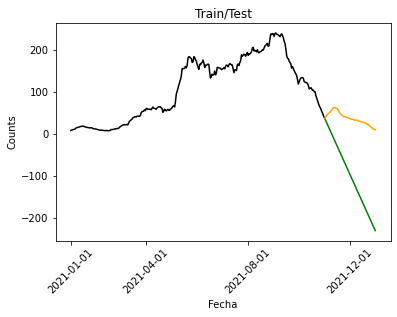

In [18]:
#Usaremos los hiperparamtros obtenidos en autoARIMA
arima = ARIMA(train,order = (0, 2, 3))
arima = arima.fit()

arima_pred = arima.get_forecast(len(test.index))
#Un 95% de confianza
arima_pred_df = arima_pred.conf_int(alpha = 0.05) 
arima_pred_df["Prediccion"] = arima.predict(start = arima_pred_df.index[0], end = arima_pred_df.index[-1])
arima_pred_df.index = test.index
arima_pred_out = arima_pred_df["Prediccion"] 
 
    
plt.plot(train, color = "black")
plt.plot(test, color = "Orange")
plt.plot(arima_pred_out, color='green', label = 'Predictions')
plt.ylabel('Counts')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

In [19]:
#Error cuadratico medio
arima_error = np.sqrt(mean_squared_error(test["count"].values, arima_pred_df["Prediccion"]))
print("Error cuadratico medio: ",arima_error)
arima.summary()

Error cuadratico medio:  150.40021836894522


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  304
Model:                 ARIMA(0, 2, 3)   Log Likelihood                -882.150
Date:                Tue, 18 Oct 2022   AIC                           1772.300
Time:                        23:12:56   BIC                           1787.142
Sample:                    01-01-2021   HQIC                          1778.239
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6581      0.044    -14.847      0.000      -0.745      -0.571
ma.L2         -0.3479      0.052     -6.687      0.000      -0.450      -0.246
ma.L3          0.1357      0.047      2.914      0.004       0.044       0.227
sigma2        20.0729      1.148     17.487      0.000      17.823      22.323
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                55.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              10.49   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediccion usando ARMA

In [20]:
#Prediccion
arma_pred = arma.get_forecast(len(fecha_predic.index))
#Un 95% de confianza
arma_pred_df = arma_pred.conf_int(alpha = 0.05) 
arma_pred_df["Prediccion"] = arma.predict(start = arma_pred_df.index[0], end = arma_pred_df.index[-1])
arma_pred_df.index = fecha_predic.index

In [21]:
#Resultado de la prediccion
arma_pred_df['Prediccion'].mean()

37.0257140024825

# Modelado de tiempo de viaje por dia 

In [22]:
means.pop('hora')
means.pop('mes')
means.pop('dia')
means.set_index('fecha', inplace=True)
means

,Trip Duration
fecha,
2021-01-01,1350.500000
2021-01-02,958.142857
2021-01-03,883.750000
2021-01-04,1072.857143
2021-01-05,1252.333333
...,...
2021-12-27,864.545455
2021-12-28,786.550000
2021-12-29,824.500000


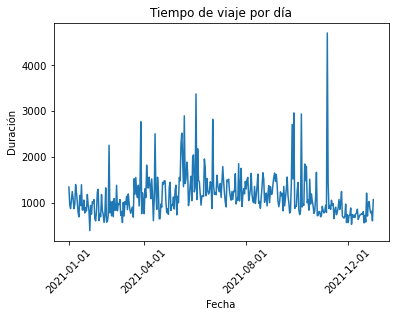

In [23]:
#Grafico de linea Duracion vs Dia
plt.plot(means.index, means['Trip  Duration'])
plt.ylabel('Duración')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Tiempo de viaje por día")
plt.show()

In [24]:
coso = means['Trip  Duration'].diff()
coso

fecha
2021-01-01           NaN
2021-01-02   -392.357143
2021-01-03    -74.392857
2021-01-04    189.107143
2021-01-05    179.476190
                 ...    
2021-12-27   -170.978355
2021-12-28    -77.995455
2021-12-29     37.950000
2021-12-30   -209.200000
2021-12-31    462.054839
Name: Trip  Duration, Length: 365, dtype: float64

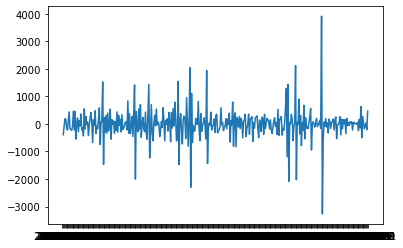

In [25]:
plt.plot(coso)
plt.show()

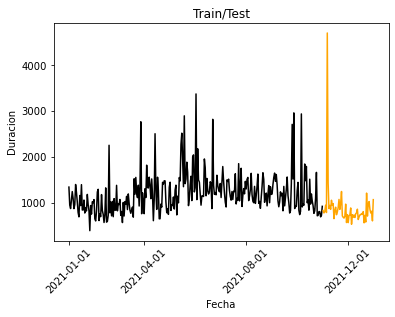

In [26]:
#Entrenamiento y testeo
train2 = means[means.index < "2021-11-01"]
test2 = means[means.index >= "2021-11-01"]

#Grafico de testeo y entrenamiento
plt.plot(train2, color = "black")
plt.plot(test2, color = "Orange")
plt.ylabel('Duracion')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

## Modelo ARMA


C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


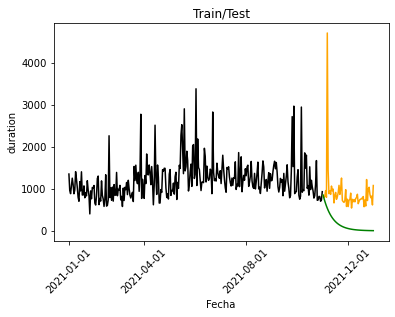

In [27]:
arma = SARIMAX(train2)
arma = arma.fit()

arma_pred = arma.get_forecast(len(test2.index))
#Un 95% de confianza
arma_pred_df = arma_pred.conf_int(alpha = 0.05) 
arma_pred_df["Prediccion"] = arma.predict(start = arma_pred_df.index[0], end = arma_pred_df.index[-1])
arma_pred_df.index = test2.index
arma_pred_out = arma_pred_df["Prediccion"]

#Graficos sobrepuestos
plt.plot(train2, color = "black")
plt.plot(test2, color = "Orange")
plt.plot(arma_pred_out, color='green', label = 'Predictions')
plt.ylabel('duration')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

In [28]:
#Error cuadratico medio
arma_error = np.sqrt(mean_squared_error(test2["Trip  Duration"].values, arma_pred_df["Prediccion"]))
print("Error cuadratico medio: ",arma_error)
arma.summary()

Error cuadratico medio:  886.2933214035586


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Trip  Duration   No. Observations:                  304
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2335.898
Date:                Tue, 18 Oct 2022   AIC                           4675.796
Time:                        23:13:01   BIC                           4683.230
Sample:                    01-01-2021   HQIC                          4678.770
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9121      0.017     53.030      0.000       0.878       0.946
sigma2      2.748e+05   1.27e+04     21.552      0.000     2.5e+05       3e+05
===================================================================================
Ljung-Box (L1) (Q):                  71.08   Jarque-Bera (JB):               260.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.12
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Modelo ARIMA

C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


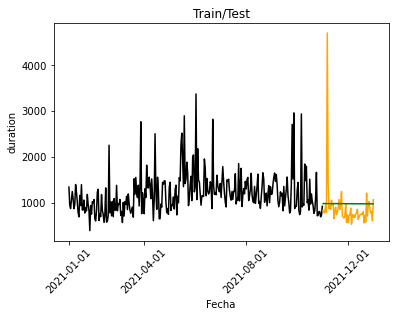

In [29]:
arima = ARIMA(train2,order = (0, 2, 3))
arima = arima.fit()

arima_pred = arima.get_forecast(len(test2.index))
#Un 95% de confianza
arima_pred_df = arima_pred.conf_int(alpha = 0.05) 
arima_pred_df["Prediccion"] = arima.predict(start = arima_pred_df.index[0], end = arima_pred_df.index[-1])
arima_pred_df.index = test2.index
arima_pred_out = arima_pred_df["Prediccion"] 
 
    
plt.plot(train2, color = "black")
plt.plot(test2, color = "Orange")
plt.plot(arima_pred_out, color='green', label = 'Predictions')
plt.ylabel('duration')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

In [30]:
#Error cuadratico medio
arima_error = np.sqrt(mean_squared_error(test2["Trip  Duration"].values, arima_pred_df["Prediccion"]))
print("Error cuadratico medio: ",arima_error)
arima.summary()

Error cuadratico medio:  530.1566241220705


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Trip  Duration   No. Observations:                  304
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -2246.728
Date:                Tue, 18 Oct 2022   AIC                           4501.455
Time:                        23:13:01   BIC                           4516.297
Sample:                    01-01-2021   HQIC                          4507.393
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8692      0.063    -29.662      0.000      -1.993      -1.746
ma.L2          0.8330      0.101      8.240      0.000       0.635       1.031
ma.L3          0.0362      0.052      0.697      0.486      -0.066       0.138
sigma2      1.636e+05    8.9e-07   1.84e+11      0.000    1.64e+05    1.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               492.68
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             1.80
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.5e+27. Standard errors may be unstable.
"""

## Prediccion usando ARIMA

In [31]:
#Prediccion
arima_pred = arima.get_forecast(len(fecha_predic.index))
#Un 95% de confianza
arima_pred_df = arima_pred.conf_int(alpha = 0.05) 
arima_pred_df["Prediccion"] = arima.predict(start = arima_pred_df.index[0], end = arima_pred_df.index[-1])
arima_pred_df.index = fecha_predic.index


In [32]:
#Resultado promedio de la predicción 
arima_pred_df["Prediccion"].mean()

989.1651385019086

# Modelado de tiempo de viaje por día 

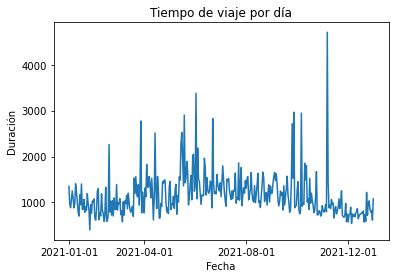

In [33]:
#Gráfico de línea Duración vs Día

plt.plot(means.index, means['Trip  Duration'])
plt.ylabel('Duración')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'])
plt.title("Tiempo de viaje por día")
plt.show()

In [34]:
coso = means['Trip  Duration'].diff()
coso

fecha
2021-01-01           NaN
2021-01-02   -392.357143
2021-01-03    -74.392857
2021-01-04    189.107143
2021-01-05    179.476190
                 ...    
2021-12-27   -170.978355
2021-12-28    -77.995455
2021-12-29     37.950000
2021-12-30   -209.200000
2021-12-31    462.054839
Name: Trip  Duration, Length: 365, dtype: float64

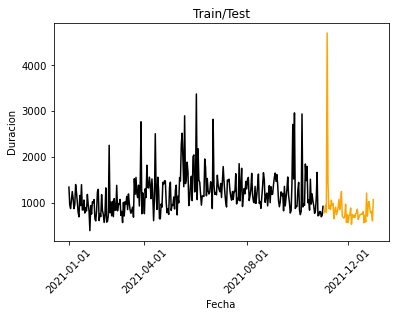

In [35]:
#Entrenamiento y testeo
train2 = means[means.index < "2021-11-01"]
test2 = means[means.index > "2021-11-01"]

#Gráfico de testeo y entrenamiento
plt.plot(train2, color = "black")
plt.plot(test2, color = "Orange")
plt.ylabel('Duracion')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

# Modelo ARMA

C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


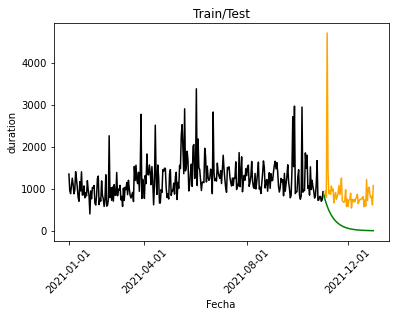

In [36]:
arma = SARIMAX(train2)
arma = arma.fit()

arma_pred = arma.get_forecast(len(test2.index))
#Un 95% de confianza
arma_pred_df = arma_pred.conf_int(alpha = 0.05) 
arma_pred_df["Prediccion"] = arma.predict(start = arma_pred_df.index[0], end = arma_pred_df.index[-1])
arma_pred_df.index = test2.index
arma_pred_out = arma_pred_df["Prediccion"]

#Gráficos sobrepuestos
plt.plot(train2, color = "black")
plt.plot(test2, color = "Orange")
plt.plot(arma_pred_out, color='green', label = 'Predictions')
plt.ylabel('duration')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

In [37]:
#Error cuadrático medio
arma_error = np.sqrt(mean_squared_error(test2["Trip  Duration"].values, arma_pred_df["Prediccion"]))
print("Error cuadratico medio: ",arma_error)
arma.summary()

Error cuadratico medio:  882.5037728364435


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Trip  Duration   No. Observations:                  304
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2335.898
Date:                Tue, 18 Oct 2022   AIC                           4675.796
Time:                        23:13:02   BIC                           4683.230
Sample:                    01-01-2021   HQIC                          4678.770
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9121      0.017     53.030      0.000       0.878       0.946
sigma2      2.748e+05   1.27e+04     21.552      0.000     2.5e+05       3e+05
===================================================================================
Ljung-Box (L1) (Q):                  71.08   Jarque-Bera (JB):               260.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.12
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Modelo ARIMA

C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mc_mo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


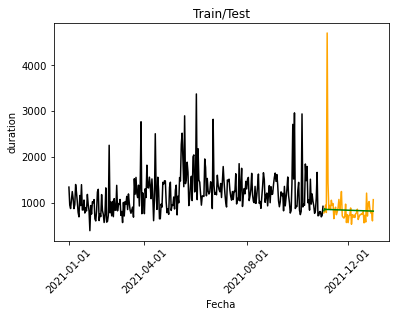

In [38]:
arima = ARIMA(train2,order = (1, 2, 1))
arima = arima.fit()

arima_pred = arima.get_forecast(len(test2.index))
#Un 95% de confianza
arima_pred_df = arima_pred.conf_int(alpha = 0.05) 
arima_pred_df["Prediccion"] = arima.predict(start = arima_pred_df.index[0], end = arima_pred_df.index[-1])
arima_pred_df.index = test2.index
arima_pred_out = arima_pred_df["Prediccion"] 
 
    
plt.plot(train2, color = "black")
plt.plot(test2, color = "Orange")
plt.plot(arima_pred_out, color='green', label = 'Predictions')
plt.ylabel('duration')
plt.xlabel('Fecha')
plt.xticks(['2021-01-01','2021-04-01','2021-08-01','2021-12-01'], rotation = 45)
plt.title("Train/Test")
plt.show()

In [39]:
#Error cuadrático medio
arima_error = np.sqrt(mean_squared_error(test2["Trip  Duration"].values, arima_pred_df["Prediccion"]))
print("Error cuadratico medio: ",arima_error)
arima.summary()

Error cuadratico medio:  524.7046581415658


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Trip  Duration   No. Observations:                  304
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2289.364
Date:                Tue, 18 Oct 2022   AIC                           4584.728
Time:                        23:13:02   BIC                           4595.859
Sample:                    01-01-2021   HQIC                          4589.182
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4820      0.033    -14.602      0.000      -0.547      -0.417
ma.L1         -1.0000      0.047    -21.155      0.000      -1.093      -0.907
sigma2      2.205e+05   2.14e-07   1.03e+12      0.000    2.21e+05    2.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.47   Jarque-Bera (JB):               243.86
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             0.94
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.69e+26. Standard errors may be unstable.
"""

# Predicción usando ARIMA

In [40]:
#Predicción
arima_pred = arima.get_forecast(len(fecha_predic.index))
#Un 95% de confianza
arima_pred_df = arima_pred.conf_int(alpha = 0.05) 
arima_pred_df["Prediccion"] = arima.predict(start = arima_pred_df.index[0], end = arima_pred_df.index[-1])
arima_pred_df.index = fecha_predic.index

In [41]:
#Resultado promedio de la predicción 
arima_pred_df["Prediccion"].mean()

846.8607965639925